# 신생아 이름

* 미국사회보장국(SSA)에서는 1880년부터 현재까지 가장 빈도가 높은 신생아 이름에 대한 정보를 제공하고 있다.

* 여러 가지 유명한 R 패키지 개발자인 해들리 위컴은 R에서 데이터를 다루는 방법을 설명할 때 종종 이 데이터셋을 활용한다.



> 📌 이 데이터를 이용해서 여러 가지 분석을 할 수 있다.
* 시대별로 특정 이름이 차지하는 비율을 구해 얼마나 흔한 이름인지 알아보기
* 이름의 상대 순위 알아보기
* 각 연도별로 가장 인기 있는 이름, 가장 많이 증가하거나 감소한 이름 알아보기
* 모음, 자음, 길이, 전체 다양성, 철자 변화, 첫 글자와 마지막 글자 등 이름 유행 분석하기
* 성서에 등장하는 이름, 유명인 인구통계학적 변화 등 외부 자료를 통한 유행 분석

# 데이터 소개

* 1879년 이후 YYYY 생년월일에 대해, 쉼표로 구분된 파일을 만들었다.
* yobYYY.txt 개별 연도 파일의 각 변수는 `name, sex, number` 형식을 가진다.
* `name`은 2~15자이고, `sex`는 남성 또는 여성이다.
* `number`의 경우 이름의 출현 횟수이다. 내림차순으로 정렬이 되어 있으며, **성별**에 따라 정렬된다. 
* 발생 횟수가 동률인 경우 알파벳 순으로 나열된다.
* 개인 정보 보호를 위해 이름 목록을 5번 이상 나오는 이름으로 제한한다.

# (1) 데이터 다루기

* 유닉스의 `head`명령어를 사용하여 이 파일들 중 하나에서 처음 10줄을 먼저 살펴볼 수 있습니다.

In [4]:
!head -n 10 /content/drive/MyDrive/Colab\ Notebooks/babynames/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


---

* 데이터가 **쉼표**로 구분되어 있습니다. <br>`pandas.reac_csv` 메서드를 활용하여 DataFrame 객체로 불러올 수 있습니다.

In [6]:
import pandas as pd

names1880 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])

names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


* 이 데이터는 각 연도별로 최소 5명 이상 중복되는 이름만 포함하고 있습니다.
* 따라서 편의상 성별 출생수를 모두 합한 값을 해당 연도의 **전체 출생수**라고 가정하겠습니다.

In [7]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

## (1-1) 데이터 합치기

* 자료가 연도별 파일로 나뉘어져 있습니다. (1880년 ~ 2010년)
* 모든 데이터를 `DataFrame` 하나로 모은 다음 `year` 항목을 추가하겠습니다.
* `pandas.concat`을 이용하면 작업을 쉽게 할 수 있습니다.

In [13]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '/content/drive/MyDrive/Colab Notebooks/babynames/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True) # False: 기존 index 유지, True: 기존 index 무시

In [14]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


* `concat` 메서드는 **DataFrame** 객체를 합쳐줍니다.
* `read_csv`로 읽어온 원래 로우 순서는 몰라도 되니 `concat` 메서드에 `ignore_index=True`를 인자로 전달해야 합니다.

---

## (1-2) `ignore_index=`❓

In [20]:
import numpy as np

df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [21]:
display(df1, df2)

,a,b,c,d
0,0.540914,-0.864830,-0.679638,-1.641468
1,-1.333636,-1.350424,-0.612774,1.123787
2,0.125717,0.098277,2.110555,0.174715


,b,d,a
0,-0.323459,-1.481444,0.544919
1,0.950553,0.445171,-0.876057


In [22]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,0.540914,-0.864830,-0.679638,-1.641468
1,-1.333636,-1.350424,-0.612774,1.123787
2,0.125717,0.098277,2.110555,0.174715
3,0.544919,-0.323459,NaN,-1.481444
4,-0.876057,0.950553,NaN,0.445171


* `ignore_index=True`의 경우는 인덱스가 0~4까지 생성이 됩니다. **기존 인덱스를 무시하기 때문입니다.**

In [23]:
pd.concat([df1, df2], ignore_index=False)

,a,b,c,d
0,0.540914,-0.864830,-0.679638,-1.641468
1,-1.333636,-1.350424,-0.612774,1.123787
2,0.125717,0.098277,2.110555,0.174715
0,0.544919,-0.323459,NaN,-1.481444
1,-0.876057,0.950553,NaN,0.445171


* `ignore_index=False`의 경우는 인덱스가 0,1,2,0,1로 생성이 됩니다. **기존 인덱스를 무시하지 않기 때문입니다.**<br>
[참고자료](https://nittaku.tistory.com/121)

---

## (1-3) 연도나 성별에 따른 데이터 수집

* 이제 이 데이터에 `groupby`나 `pivot_table`을 이용해서 연도나 성별에 따른 데이터를 수집할 수 있습니다.

In [29]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


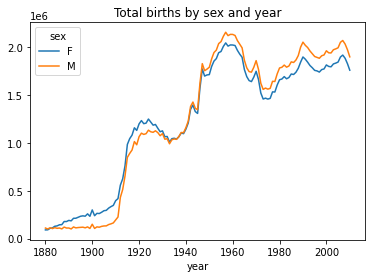

In [28]:
total_births.plot(title='Total births by sex and year')

---

## (1-4) 각 이름이 출생수에서 차지하는 비율

* `prop`(proportion)이라는 컬럼을 추가해서 각 이름이 전체 출생수에서 차지하는 비율을 계산해보겠습니다.
* prop값이 0.02라면 100명 중 2명의 이름이 같다는 뜻이 됩니다.
* `year`, `sex`로 그룹화하고 진행하겠습니다.

In [30]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [31]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


* 그룹 관련 연산을 수행할 때는 모든 그룹에서 `prop` 컬럼의 합이 1이 맞는지 확인하는 **새너티 테스트**를 하는 게 좋습니다.

* **새너티 테스트**: 버그가 수정되었고, 이러한 변경으로 인해 추가로 문제가 발생하지 않는지 확인하기 위한 작업<br>
[참고자료-새너티 테스트](total_births.tail())

In [32]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

* 모두 1이 나오는 것을 확인할 수 있습니다.

## (1-5) 선호하는 이름 1,000개 추출

In [35]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [36]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [37]:
# 그룹 색인은 필요 없으므로 삭제시킵니다.
top1000.reset_index(inplace=True, drop=True)

In [38]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


---

# (2) 이름 유행 분석

* 전체 데이터셋과 상위 1,000개의 이름 데이터로 흥미로운 이름 유행을 분석해보겠습니다.
* 먼저 상위 1,000개의 데이터를 남자아이와 여자아이로 분리하겠습니다.

In [39]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

* 연도와 이름에 대한 전체 출생수를 피벗테이블로 만들겠습니다.

In [40]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [47]:
display(total_births.info(), total_births.head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


None

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,Abbott,Abby,Abdiel,Abdul,Abdullah,Abe,Abel,Abelardo,Abigail,Abigale,Abigayle,Abner,Abraham,Abram,Abril,Ace,Acie,Ada,Adah,Adalberto,Adaline,Adalyn,Adalynn,Adam,Adamaris,Adams,Adan,Adda,Addie,...,Zayden,Zayne,Zeb,Zebulon,Zechariah,Zed,Zeke,Zela,Zelda,Zelia,Zella,Zelma,Zelpha,Zena,Zenas,Zenia,Zennie,Zeno,Zenobia,Zeta,Zetta,Zettie,Zhane,Zigmund,Zillah,Zilpah,Zilpha,Zina,Zion,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN,6.0,NaN,NaN,NaN,50.0,9.0,NaN,12.0,NaN,NaN,27.0,81.0,21.0,NaN,NaN,NaN,652.0,24.0,NaN,23.0,NaN,NaN,104.0,NaN,NaN,NaN,14.0,282.0,...,NaN,NaN,10.0,NaN,NaN,NaN,6.0,NaN,6.0,NaN,31.0,19.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,7.0,NaN,NaN,NaN,36.0,12.0,NaN,8.0,NaN,NaN,30.0,86.0,30.0,NaN,NaN,6.0,628.0,29.0,NaN,18.0,NaN,NaN,116.0,NaN,NaN,NaN,20.0,294.0,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,17.0,NaN,6.0,NaN,NaN,NaN,NaN,6.0,NaN,7.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,11.0,NaN,NaN,NaN,50.0,10.0,NaN,14.0,NaN,NaN,32.0,91.0,25.0,NaN,8.0,NaN,689.0,27.0,NaN,16.0,NaN,NaN,114.0,NaN,NaN,NaN,17.0,347.0,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,50.0,21.0,NaN,6.0,NaN,NaN,NaN,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f71fd357850>,
      dtype=object)

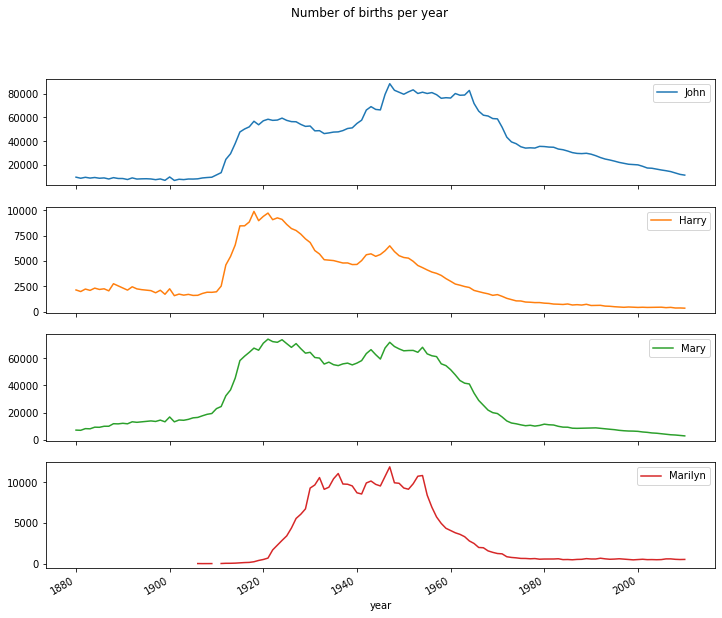

In [48]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

* 예전에 유행했던 신생아 이름은 최근에는 인기가 없다는 것을 살펴볼 수 있습니다.
* 하지만, 단순히 이렇게 결론을 내기에는 조금 복잡합니다. 다음 절에서 살펴보겠습니다.

---

## (2-1) 다양한 이름을 사용하는 경향 측정

* 위의 그래프를 확인한 결과 그래프의 감소 추세는 **부모가 아이의 이름을 지을 때 흔한 이름은 기피**한다고 해석할 수 있습니다.
* 좀 더 자세히 알아보기 위해 인기 있는 이름 1,000개가 전체 출생수에서 차지하는 비율을 연도별/성별 그래프로 그려보겠습니다.

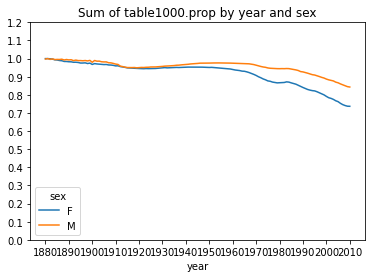

In [49]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [52]:
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


* 이름의 다양성이 증가하고 있음을 보여줍니다.(상위 1,00개의 이름에서 비율의 총합이 감소하고 있음)
* 또한 인기 있는 이름순으로 정렬했을 때 전체 출생수의 50%를 차지하기까지 등장하는 이름수도 흥미롭습니다.

## (2-2) 출생수의 50% 차지하는 이름의 수

In [51]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


* `prop`을 내림차순으로 정렬하고 나서 전체의 50%가 되기까지 얼마나 많은 이름이 등장하는지 알아보겠습니다.
* `for`문을 사용해서 구현할 수도 있지만, 벡터화된 Numpy를 사용하는 편이 조금 편합니다.
* `prop`의 누계를 `cumsum`에 저장하고 `searchsorted` 메서드를 호출해서 정렬된 상태에서 누계가 0.5되는 위치를 구하겠습니다.

In [53]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [54]:
prop_cumsum.values.searchsorted(0.5)

116

* index는 0부터 시작하기 때문에 117번째가 0.5가 되는 것을 확인할 수 있습니다.

In [55]:
df = boys[boys.year == 1900]

in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

in1900.values.searchsorted(0.5) + 1

25

* 1900이보다 더 낮음을 확인할 수 있습니다.(다양한 이름을 사용한 것이 2010년보다 낮음)

* 이제 이 연산을 각 연도별/성별 조합에 적용하겠습니다.
* 연도와 성을 `groupby`로 묶고 각 그룹에 `apply`를 사용해서 연산을 적용하겠습니다.

In [56]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


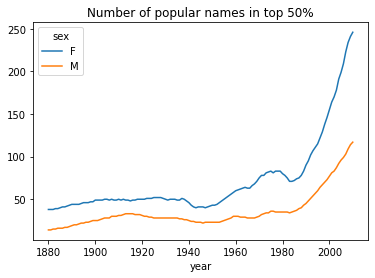

In [60]:
display(diversity.head(), diversity.plot(title='Number of popular names in top 50%'))

* 여자아이의 이름은 항상 남자아이의 이름보다 더 다양하고, 시간이 흐를수록 더욱 다양해지고 있습니다.

## (2-3) '마지막 글자'의 변화

* 2007년 아이 이름을 연구하는 로라 와튼버그는 지난 100년 동안 <br>남자아이 이름의 마지막 글자의 분포에 중요한 변화가 있었다고 자신의 웹사이트에 게재했습니다.<br>
[로라 와튼버그 - 웹사이트](http://www.babynamewizard.com)

In [61]:
# name 컬럼에서 마지막 글자를 추출합니다.
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [63]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [65]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

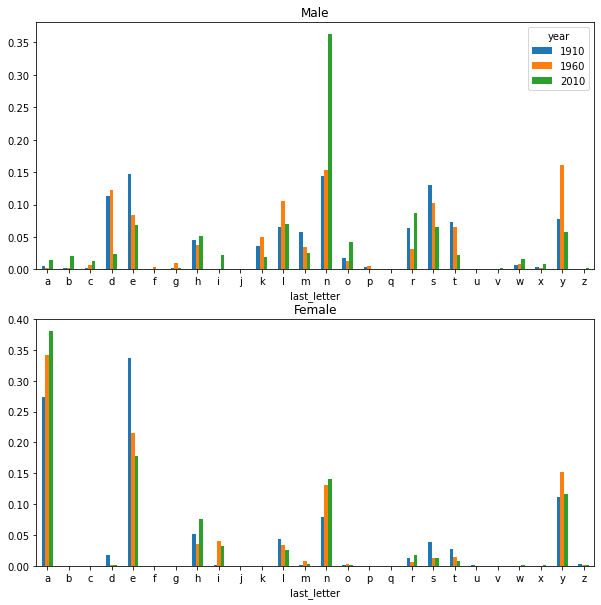

In [67]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

* 그래프에서 확인할 수 있듯이 'n'으로 끝나는 남자아이 이름의 빈도가 1960년도 이후에 급격하게 증가하였습니다.
* 이제 1910, 1960, 2010 세 지점이 아닌 전체 자료에 대해 출생연도와 성별, 남자아이 이름에서 몇가지 글자로 정규화하고 시계열 데이터로 변환하겠습니다.

In [68]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


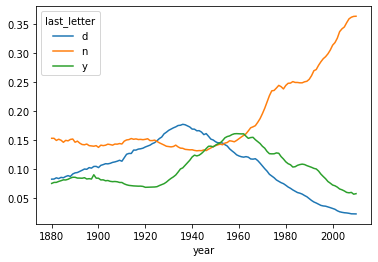

In [69]:
dny_ts.plot()

---

## (2-4) 남자 이름과 여자 이름이 바뀐 경우

* 또 다른 경향은 예전에는 남자 이름으로 선호되가 현재는 여자 이름으로 선호되는 경우가 있습니다.
* 예를 들어, Lesley 또는 Leslie라는 이름이 그렇습니다.
* top1000 데이터를 이용해서 'Lesl'로 시작하는 이름을 포함하는 목록을 만들어보겠습니다.

In [77]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

* 상대 도수는 다음과 같습니다.

In [84]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [85]:
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000371
258036,Leslie,F,1975,2009,0.001081
258378,Lesly,F,598,2009,0.000327
260073,Leslie,F,1558,2010,0.000886


* 성별과 연도별로 모든 다음 출생연도로 정규화하겠습니다.

In [86]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')

In [89]:
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [96]:
table.sum(1) #sum(1)로 하면 연도별로 합쳐주게 됩니다.

year
1880      87.0
1881     103.0
1882     137.0
1883     132.0
1884     140.0
         ...  
2006    4166.0
2007    3805.0
2008    3022.0
2009    2573.0
2010    2060.0
Length: 131, dtype: float64

In [103]:
table = table.div(table.sum(1), axis=0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


* 마지막으로 시대별로 성별에 따른 명세를 그래프로 그려보겠습니다.

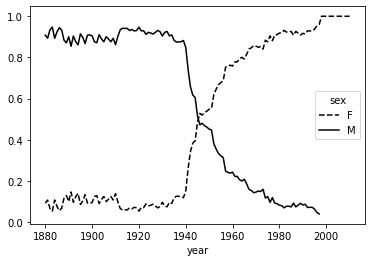

In [79]:
table.plot(style={'M': 'k-', 'F': 'k--'})

* 1950년 부터 `lesl`로 시작하는 신생아 이름이 여자 아이에게 더 많이 사용이 되었다.
* 최근 들어는 `lesl`로 시작하는 신생아 이름 중에서 남자 아이의 비율은 0에 가깝다.